In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# 导入数据

In [6]:
path = r'C:\Users\Administrator\Desktop\大数据学院\统计软件\期末资料\空难数据\Airplane_Crashes_and_Fatalities_Since_1908.csv'
f = open(path,encoding='utf-8')
df = pd.read_csv(f)

In [2]:
df.info()
# 只有Date没有缺失值，Time、Flight # 、Route 、cn/In缺失值很多

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [3]:
print("dimennsion of airplane crashes data:{}".format(df.shape)) #(5268, 13)

dimennsion of airplane crashes data:(5268, 13)


# 空难次数随年份和月份变换情况

In [4]:
# get year,month from Date
def getdate(df):
    date = []
    year = []
    month = []
    for i in range(len(df)):
        list = re.split('/',df.Date[i])
        date.append(list)
        year.append(int(list[2]))
        month.append(int(list[0]))
    return date, year, month

date, year, month = getdate(df)

# year[::]show all elements in list
set(year[::])  # 1908-2009
set(month[::]) # 01-12

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [136]:
# get number of different years
yearlist = [item for item in set(year[::])]
yearnum = [year.count(i) for i in yearlist]

from pyecharts import Bar
bar = Bar("Airplane crashes", "year")
bar.add("空难", yearlist, yearnum, mark_point=['max'], legend_text_color='red', is_datazoom_show=True)
# bar.print_echarts_options() # 该行只为了打印配置项，方便调试时使用
bar.render("空难分布年份.html")    # 生成本地 HTML 文件
bar

In [156]:
# get number of different months
monthlist = [item for item in set(month[::])]
monthnum = [month.count(i) for i in monthlist]

from pyecharts import Bar
bar1 = Bar("Airplane crashes", "month")
bar1.add("空难", monthlist, monthnum, mark_point=['max','min'])
# bar.print_echarts_options() # 该行只为了打印配置项，方便调试时使用
bar1.render("空难分布月份.html")    # 生成本地 HTML 文件
bar1

# 画年份和月份交替的 3D 图

In [8]:
# get 3-D picture
# 获得年份和月份分布的频数
data = np.zeros((102,12))
for i in range(5268):
    data[year[i]-1908,month[i]-1] = data[year[i]-1908,month[i]-1]+1

# 发生空难次数最多的月份
data.max()  # 17

17.0

In [11]:
# 构建三维数据集
# (y,x,z)格式
data1 = []
for i in range(102):
    for j in range(12):
        data1.append([j,i,data[i,j]])
data1[0:6]

[[0, 0, 0.0], [1, 0, 0.0], [2, 0, 0.0], [3, 0, 0.0], [4, 0, 0.0], [5, 0, 0.0]]

In [12]:
# get 3-D picture
from pyecharts import Bar3D

bar3d = Bar3D("空难分布 3D 柱状图","year-month", width=1200, height=600)
x_axis = yearlist
y_aixs = monthlist

range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add("", x_axis, y_aixs, [[d[1], d[0], d[2]] for d in data1], is_visualmap=True,
          visual_range=[0, 20], visual_range_color=range_color, grid3d_width=200, grid3d_depth=80)
bar3d.render("空难分布年月3D.html")    # 生成本地 HTML 文件
bar3d

# 空难次数随小时变化情况

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# 提取小时数，对数据框处理结果如下
def get_hour(x):
    hour = x.split(":")[0]
    try:
        hour = int(hour)
        if int(hour) == hour and hour < 24:
            return hour
        else:
            return np.nan
    except:
        return np.nan
    
time_df = df[df["Time"].isnull() == False]
time_df["hour"] = time_df["Time"].map(get_hour)
time_df = time_df[time_df["hour"].isnull() == False]
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3036 entries, 0 to 5266
Data columns (total 14 columns):
Date            3036 non-null object
Time            3036 non-null object
Location        3033 non-null object
Operator        3033 non-null object
Flight #        996 non-null object
Route           2561 non-null object
Type            3035 non-null object
Registration    2940 non-null object
cn/In           2434 non-null object
Aboard          3036 non-null float64
Fatalities      3036 non-null float64
Ground          3034 non-null float64
Summary         3020 non-null object
hour            3036 non-null float64
dtypes: float64(4), object(10)
memory usage: 355.8+ KB


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


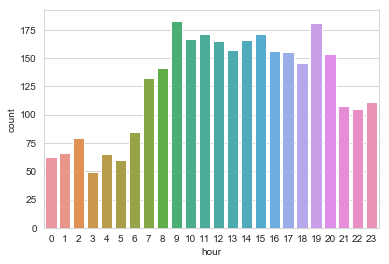

In [55]:
time_df["hour"] = time_df["hour"].astype('int')

import seaborn as sns
sns.set_style("whitegrid")
ax = sns.countplot(x="hour", data=time_df)

# 空难发生地点可视化

In [112]:
import re
# 只选取Location不为Null的数据
location_df = df[df["Location"].isnull() == False].reset_index()

# 提取所以的地方名
def getwords(location_df):
    words = []
    for i in range(len(location_df)):
        word = re.sub(" ","",location_df["Location"][i]).split(',')
        words.extend(word) 
    return words
words = getwords(location_df)

# 看一共有多少个地名
print('地址总数:'+' '+str(len(set(words))))
# 词汇丰富度
print('词汇丰富度:'+' '+str(len(words)/len(set(words))))
# 查找地名出现次数多于15次的个数
V = set(words)
freq_15 = [w for w in V if len(w)>=15]
print('查找地名出现次数多于15次的个数:'+' '+str(len(freq_15)))
# 查找地名出现次数多于10次的个数
V = set(words)
freq_10 = [w for w in V if len(w)>=10]
print('查找地名出现次数多于10次的个数:'+' '+str(len(freq_10)))

地址总数: 4570
词汇丰富度: 2.3308533916849017
查找地名出现次数多于15次的个数: 501
查找地名出现次数多于10次的个数: 2306


In [63]:
# 导入文本处理包nltk
import nltk

# 出现最频繁的地点
fd =nltk.FreqDist(words).most_common()
fd

[('Brazil', 189),
 ('Alaska', 177),
 ('Russia', 175),
 ('Canada', 149),
 ('Colombia', 149),
 ('California', 143),
 ('France', 133),
 ('England', 105),
 ('India', 99),
 ('China', 88),
 ('Indonesia', 87),
 ('NewYork', 83),
 ('Mexico', 83),
 ('Germany', 79),
 ('Italy', 79),
 ('Australia', 78),
 ('Philippines', 68),
 ('Spain', 65),
 ('USSR', 61),
 ('Venezuela', 58),
 ('Peru', 54),
 ('Texas', 52),
 ('Ohio', 50),
 ('Bolivia', 46),
 ('Washington', 45),
 ('Japan', 45),
 ('Argentina', 44),
 ('Angola', 43),
 ('Pennsylvania', 42),
 ('Florida', 42),
 ('Colorado', 42),
 ('Illinois', 41),
 ('NewJersey', 40),
 ('Iran', 38),
 ('Egypt', 38),
 ('SouthVietnam', 38),
 ('Georgia', 36),
 ('Taiwan', 36),
 ('Vietnam', 36),
 ('Hawaii', 35),
 ('Ecuador', 34),
 ('Nigeria', 33),
 ('Arizona', 32),
 ('Afghanistan', 32),
 ('Turkey', 31),
 ('Norway', 30),
 ('Sudan', 30),
 ('Pakistan', 30),
 ('Nevada', 29),
 ('Michigan', 28),
 ('NorthCarolina', 28),
 ('NewMexico', 27),
 ('Greece', 26),
 ('Missouri', 26),
 ('Laos', 26)

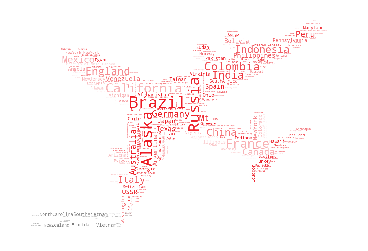

In [128]:
# 制作词云
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

backgroud_Image = plt.imread('C:\\Users\\Administrator\\Desktop\\大数据学院\\统计软件\\期末资料\\空难数据\\plane.jpg')   # 自己可以换
wc = WordCloud(mask = backgroud_Image,
               max_words = 2000,
               max_font_size = 50,
              background_color='white') 
wc.generate(' '.join(words))
image_colors = ImageColorGenerator(backgroud_Image)
wc.recolor(color_func = image_colors)
plt.imshow(wc)
plt.axis('off')
plt.show()

# 储存图片
wc.to_file("words.jpg")

In [175]:
# 统计各州发生空难的人数
states_usa_words = [
        'Alabama','Alaska','Arizona','Arkansas','California',
        'Colorado','Columbia','Connecticut','Delaware','Florida',
        'Georgia','Hawaii','Idaho','Illinois','Indiana',
        'Iowa','Kansas','Kentucky','Louisiana','Maine',
        'Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
        'Missouri','Montana','Nebraska','Nevada','NewHampshire',
        'NewJersey','NewMexico','NewYork','NorthCarolina','NorthDakota',
        'Ohio','Oklahoma','Oregon','Pennsylvania','RhodeIsland',
        'SouthCarolina','SouthDakota','Tennessee','Texas','Utah',
        'Vermont','Virginia','Washington','WestVirginia','Wisconsin',
        'Wyoming','PuertoRico']

states_usa_num = [words.count(state) for state in states_usa_words]

In [176]:
# 需要将pyecharts和words中的洲名一一对应
# New Hampshire -- NewHampshire    # New Jersey -- NewJersey   # New Mexico -- NewMexico
# North Carolina -- NorthCarolina  # New York -- NewYork       # North Dakota -- NorthDakota
# Rhode Island -- RhodeIsland      # South Carolina -- SouthCarolina
# South Dakota -- SouthDakota      # West Virginia -- WestVirginia
# Puerto Rico -- PuertoRico

states_usa_pyecharts = [
        'Alabama','Alaska','Arizona','Arkansas','California',
        'Colorado','Columbia','Connecticut','Delaware','Florida',
        'Georgia','Hawaii','Idaho','Illinois','Indiana',
        'Iowa','Kansas','Kentucky','Louisiana','Maine',
        'Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
        'Missouri','Montana','Nebraska','Nevada','New Hampshire',
        'New Jersey','New Mexico','New York','North Carolina','North Dakota',
        'Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
        'South Carolina','South Dakota','Tennessee','Texas','Utah',
        'Vermont','Virginia','Washington','West Virginia','Wisconsin',
        'Wyoming','Puerto Rico']

In [177]:
# 空难地点可视化
from pyecharts import Map
map0 = Map("美国各州发生空难次数","1908-2009", width=1200, height=600)
map0.add("美国各州发生空难次数", states_usa_pyecharts, states_usa_num, maptype="美国", visual_range=[0, 180],
         is_visualmap=True, visual_text_color='#000', is_map_symbol_show=False)
map0.render('美国各州发生空难次数.html')
map0

In [151]:
# words和pyecharts地名进行一一对应
cites_words = [fd[i][0] for i in range(len(fd))]
def getfreq(cites_words, cities_pyecharts, words, states_usa_words):
    same = []
    none = []
    k = 0
    for i in range(len(cites_words)):
        if cites_words[i] in cities_pyecharts:
            same.append([cites_words[i],words.count(cites_words[i])])
        elif cites_words[i] in states_usa_words:
            k = k+1
        else:
            none.append([cites_words[i],words.count(cites_words[i])])
    return same, none

same, none = getfreq(cites_words, cities_pyecharts, words, states_usa_words)

print('数据集和pyecharts有多少个地名相同'+' '+str(len(same)))
print('数据集和pyecharts有多少个地名不同（去除美国51个洲）'+' '+str(len(none)))
none[0:20]

数据集和pyecharts有多少个地名相同 144
数据集和pyecharts有多少个地名不同（去除美国51个洲） 4375


[['England', 105],
 ['USSR', 61],
 ['SouthVietnam', 38],
 ['Taiwan', 36],
 ['Laos', 26],
 ['NewZealand', 24],
 ['BritishColumbia', 23],
 ['NewGuinea', 22],
 ['SouthAfrica', 20],
 ['PapuaNewGuinea', 20],
 ['RiodeJaneiro', 18],
 ['AtlantiOcean', 18],
 ['Ontario', 17],
 ['Scotland', 17],
 ['Newfoundland', 17],
 ['SouthKorea', 17],
 ['DemocratiRepubliCongo', 17],
 ['SaoPaulo', 16],
 ['SaudiArabia', 16],
 ['Czechoslovakia', 15]]

In [154]:
# 20-36名大多是城市
none[20:36]

[['Moscow', 15],
 ['Yugoslavia', 14],
 ['Quebec', 14],
 ['SriLanka', 13],
 ['Bogota', 13],
 ['Manila', 13],
 ['Anchorage', 13],
 ['Chicago', 12],
 ['Cairo', 12],
 ['CostaRica', 12],
 ['Zaire', 12],
 ['Burma', 11],
 ['HongKong', 11],
 ['NearMoscow', 10],
 ['London', 10],
 ['Paris', 9]]

In [155]:
# 出现次数最多的城市排名，加上大西洋
city = ['里约热内卢','大西洋','圣保罗','莫斯科','波哥大','马尼拉','安克雷奇','芝加哥','开罗','伦敦','巴黎']
num = [18,18,16,15,13,13,13,12,12,10,9]

from pyecharts import Bar
bar2 = Bar("空难城市分布图", "1908-2009")
bar2.add("城市", city, num, mark_point=['max','min'], legend_text_color='red', is_datazoom_show=True)
# bar.print_echarts_options() # 该行只为了打印配置项，方便调试时使用
bar2.render("空难城市分布图.html")    # 生成本地 HTML 文件
bar2

In [166]:
'''地点出现次数大于10的均转化成pyecharts中的地名'''
# England -- 105 -- United Kingdom
# USSR -- 苏联61 -- Russia
# SouthVietnam -- 二战时的越南38 -- Vietnam
# Taiwan -- 台湾 -- China
# Laos -- 老挝26 -- Lao PDR
# NewZealand -- 纽西兰 -- New Zealand
# NewGuinea -- 巴布亚新几内亚独立国 -- Papua New Guinea
# PuertoRico -- Puerto Rico
# SouthAfrica -- South Africa
# PapuaNewGuinea -- Papua New Guinea
# Scotland -- United Kingdom
# Congo -- 刚果 -- Congo
# SouthKorea -- 朝鲜 -- Korea
# DemocratiRepubliCongo -- 刚果民主共和国 -- Dem. Rep. Congo
# SaudiArabia -- 沙特 -- Saudi Arabia
# Czechoslovakia -- 捷克斯洛伐克二战  -- Slovakia
# Czechoslovakia -- 捷克斯洛伐克二战  -- Czech Rep.
# Yugoslavia -- 二战南斯拉夫
# SriLanka -- 斯里兰卡 -- Sri Lanka
# CostaRica -- 哥斯达黎加 -- Costa Rica
# Burma -- 二战缅甸 -- Myanmar
# HongKong -- 香港 -- China

country_transform_dic = {'England':'United Kingdom','USSR':'Russia','SouthVietnam':'Vietnam',
                     'Taiwan':'China','Laos':'Lao PDR','NewZealand':'New Zealand',
                     'NewGuinea':'Papua New Guinea','PuertoRico':'Puerto Rico','SouthAfrica':'South Africa',
                     'PapuaNewGuinea':'Papua New Guinea','Scotland':'United Kingdom','SouthKorea':'Korea',
                     'DemocratiRepubliCongo':'Dem. Rep. Congo','SaudiArabia':'Saudi Arabia',
                     'Czechoslovakia':'Slovakia','SriLanka':'Sri Lanka','CostaRica':'Costa Rica',
                     'Burma':'Myanmar','HongKong':'China',
                     'SierraLeone':'Sierra Leone','EquatorialGuinea':'Eq. Guinea','BosniaHerzegovina':'Bosnia and Herz.',
                     'SolomonIslands':'Solomon Is.','EastTimor':'Timor-Leste','NorthKorea':'Dem. Rep. Korea',
                     'UnitedArabEmirates':'United Arab Emirates','CentralAfricanRepublic':'Central African Rep.',
                     'DominicanRepublic':'Dominican Rep.','ElSalvador':'El Salvador'}
country_transform = ['England','USSR','SouthVietnam','Taiwan','Laos',
                     'NewZealand','NewGuinea','PuertoRico','SouthAfrica','PapuaNewGuinea',
                     'Scotland','SouthKorea','DemocratiRepubliCongo','SaudiArabia','Czechoslovakia',
                     'SriLanka','CostaRica','Burma','HongKong',
                     'SierraLeone','EquatorialGuinea','BosniaHerzegovina','SolomonIslands','EastTimor',
                     'NorthKorea','UnitedArabEmirates','CentralAfricanRepublic','DominicanRepublic','ElSalvador']

In [167]:
# words中地名替换成pyecharts中地名
same_country = [same[i][0] for i in range(len(same))]
same_num = [same[i][1] for i in range(len(same))]

none_country = [none[i][0] for i in range(len(none))]
none_num = [none[i][1] for i in range(len(none))]

# 进行替换
def transform(none_country, country_transform, country_transform_dic):
    for i in range(len(none_country)):
        if none_country[i] in set(country_transform):
            for key,value in country_transform_dic.items():
                none_country[i] = none_country[i].replace(key,value)
        else:
            none_country[i] = none_country[i]
    return none_country

none_country = transform(none_country, country_transform, country_transform_dic)
none_country[0:20]

['United Kingdom',
 'Russia',
 'Vietnam',
 'China',
 'Lao PDR',
 'New Zealand',
 'BritishColumbia',
 'Papua New Guinea',
 'South Africa',
 'PapuaPapua New Guinea',
 'RiodeJaneiro',
 'AtlantiOcean',
 'Ontario',
 'United Kingdom',
 'Newfoundland',
 'Korea',
 'Dem. Rep. Congo',
 'SaoPaulo',
 'Saudi Arabia',
 'Slovakia']

In [168]:
country = same_country+(none_country)
num = same_num+none_num
print('各地区空难数最大值'+' '+str(max(num)))
print('各地区空难数最小值'+' '+str(min(num)))
print('美国各州加和'+' '+str(sum(states_usa_num)))

# 加入美国和斯洛伐克，显示方便，美国空难数记作200
country = country+['Czech Rep.','S. Sudan','United States']
num = num+[15, 30, 200]

# 全球一共218个地区在pyecharts地图上有所显示+2个地区无法显示
from pyecharts import Map
map1 = Map("全球发生空难次数","1908-2009", width=1200, height=600)
map1.add("全球发生空难次数", country, num, maptype="world", visual_range=[0, 200],
         is_visualmap=True, visual_text_color='#000', is_map_symbol_show=False)
map1.render('全球发生空难次数.html')
map1

各地区空难数最大值 189
各地区空难数最小值 1
美国各州加和 1418


# 伤亡分析

In [193]:
# 去掉文本信息
df1 = df.drop(["Summary","cn/In","Flight #","Route","Location","Type"],axis=1)

# 显示伤亡人数最多的事故
print('1908-2009年空难伤亡总人数'+' '+str(df1["Fatalities"].sum()))

fatal = df1[df1["Fatalities"].notnull()]
fatal = fatal.sort_values(by="Fatalities")
print(fatal[-5:])

print("伤亡概率: {:.3f}".format(fatal[fatal["Fatalities"] != 0]["Fatalities"].sum() / fatal[fatal["Fatalities"] != 0]["Aboard"].sum()))

1908-2009年空难伤亡总人数 105479.0
            Date   Time                                    Operator  \
3562  06/23/1985  07:15                                   Air India   
2726  03/03/1974  11:41                      Turkish Airlines (THY)   
4455  11/12/1996  18:40  Saudi Arabian Airlines / Kazastan Airlines   
3568  08/12/1985  18:56                             Japan Air Lines   
2963  03/27/1977  17:07            Pan American World Airways / KLM   

        Registration  Aboard  Fatalities  Ground  
3562          VT-EFO   329.0       329.0     0.0  
2726          TC-JAV   346.0       346.0     0.0  
4455  HZAIH/UN-76435   349.0       349.0     0.0  
3568          JA8119   524.0       520.0     0.0  
2963   N736PA/PH-BUF   644.0       583.0     0.0  
伤亡概率: 0.754


In [183]:
print('内特里费空难：两架波音-747相撞，死亡583人，又称世纪大空难')
print('日航123空难：波音747撞富士山，单架飞机失事最高死亡记录')
print('恰尔基达德里撞机事件，最严重的的空中撞机事件')
print('土耳其航空981号班机空难：货舱门未锁定导致爆炸性施压')
print('印度航空182号班机：恐怖袭击')

内特里费空难：两架波音-747相撞，死亡583人，又称世纪大空难
日航123空难：波音747撞富士山，单架飞机失事最高死亡记录
恰尔基达德里撞机事件，最严重的的空中撞机事件
土耳其航空981号班机空难：货舱门未锁定导致爆炸性施压
印度航空182号班机：恐怖袭击


# Ground

In [184]:
# Kaggle上查阅资料，发现这三个数字字段有以下含义
# Aboard: Total aboard (passengers / crew)
# Fatalities: Total fatalities aboard (passengers / crew)
# Ground:  Total killed on the ground

fata2 = df1[df1["Ground"].notnull()]
fata2 = fata2.sort_values(by="Ground")
print(fata2[-6:]) # 前6个死亡人数大于100的

            Date   Time               Operator Registration  Aboard  \
2091  12/24/1966  19:15      Flying Tiger Line       N228SW     4.0   
2933  10/13/1976    NaN  Lloyd Aéreo Boliviano       N730JP     3.0   
4802  09/11/2001  09:45      American Airlines       N644AA    64.0   
4390  01/08/1996  12:43            African Air     RA-26222     6.0   
4803  09/11/2001  08:47      American Airlines       N334AA    92.0   
4804  09/11/2001  09:03       United Air Lines       N612UA    65.0   

      Fatalities  Ground  
2091         4.0   107.0  
2933         3.0   113.0  
4802        64.0   125.0  
4390         2.0   225.0  
4803        92.0  2750.0  
4804        65.0  2750.0  


In [185]:
print('911事件，地面死亡2750人')

911事件，地面死亡2750人


In [187]:
# 提取年份信息，对Ground变量进行处理
def get_year(x):
    return x.split("/")[-1]
fata2['year'] = fata2["Date"].map(get_year)
year_ground_fata2 = fata2[fata2["year"] != np.NaN][["year","Ground"]]
year_ground_fata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5246 entries, 0 to 4804
Data columns (total 2 columns):
year      5246 non-null object
Ground    5246 non-null float64
dtypes: float64(1), object(1)
memory usage: 123.0+ KB


In [188]:
def year_analysis(x):
    return pd.Series({"year_ground_num":x["Ground"].sum(),"year_ground_max":x["Ground"].max(),
                      "year_ground_average":x["Ground"].sum() / len(x["Ground"])})
year_ground = year_ground_fata2.groupby(["year"]).apply(year_analysis)
year_ground = year_ground.sort_index()


from pyecharts import Bar

bar3 = Bar("空难地面死亡人数")
bar3.add("sum", yearlist, year_ground["year_ground_num"], mark_point=["min","max"])
bar3.add("max", yearlist, year_ground["year_ground_max"], mark_line=["min", "max"])
bar3.add("average", yearlist, year_ground["year_ground_average"], mark_line=["average"])
bar3.render('空难地面死亡人数.html')
bar3

In [189]:
# 去掉911事件
year_ground_fata2_new = year_ground_fata2[year_ground_fata2['Ground'] != 2750.0]
len(year_ground_fata2_new)

5244

In [190]:
year_ground_new = year_ground_fata2_new.groupby(["year"]).apply(year_analysis)
year_ground_new = year_ground_new.sort_index()

from pyecharts import Bar

bar4 = Bar("空难地面死亡人数")
bar4.add("sum", yearlist, year_ground_new["year_ground_num"], mark_point=["min","max"])
bar4.add("max", yearlist, year_ground_new["year_ground_max"], mark_line=["min", "max"])
bar4.add("average", yearlist, year_ground_new["year_ground_average"], mark_line=["average"])
bar4.render('空难地面死亡人数1.html')
bar4

# Aboard Fatalities

In [207]:
# 提取年份信息
#def get_year(x):
    #return x.split("/")[-1]
#fatal = df1[df1["Fatalities"].notnull()]
#fatal['year'] = fatal["Date"].map(get_year)
#year_fatalities_fata1 = fata1[fata1["year"] != np.NaN][["year","Aboard","Fatalities"]]
# year_ground_fata1.info()

year_fatalities_fata1 = fata2[['year', 'Aboard', 'Fatalities']]

# 提取每年空难死亡人数和发生空难次数和死亡率
def year_analysis_fatalities(x):
    return pd.Series({"year_fatalities_num":x["Fatalities"].sum(),"year_fatalities_time":x.shape[0],
                      "year_fatalities_ratio":x["Fatalities"].sum() / x["Aboard"].sum()})
year_fatalities = year_fatalities_fata1.groupby(["year"]).apply(year_analysis_fatalities)
year_fatalities = year_fatalities.sort_index()
year_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 1908 to 2009
Data columns (total 3 columns):
year_fatalities_num      98 non-null float64
year_fatalities_time     98 non-null float64
year_fatalities_ratio    98 non-null float64
dtypes: float64(3)
memory usage: 3.1+ KB


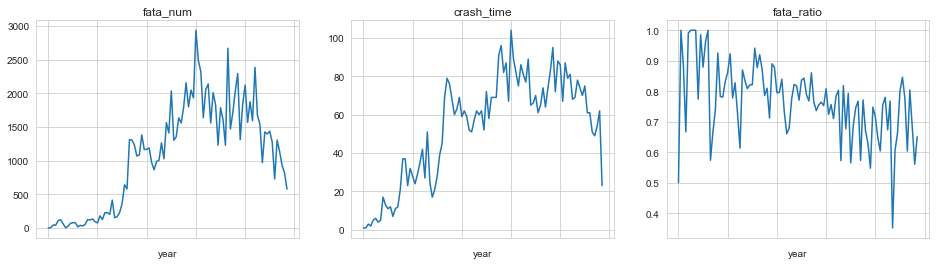

In [211]:
plt.close()
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
year_fatalities["year_fatalities_num"].plot(title="fata_num")
plt.subplot(1,3,2)
year_fatalities["year_fatalities_time"].plot(title="crash_time")
plt.subplot(1,3,3)
year_fatalities["year_fatalities_ratio"].plot(title="fata_ratio")
plt.show()

In [210]:
# 提取小时信息
def get_hour(x):
    hour = x.split(":")[0]
    try:
        hour = float(hour)
        if int(hour) == hour and hour < 24:
            return hour
        else:
            return np.nan
    except:
        return np.nan

fata3 = df[df["Time"].isnull() == False]
fata3["hour"] = fata3["Time"].map(get_hour)
year_fatalities_fata3 = fata3[['hour', 'Aboard', 'Fatalities']]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [213]:
# 提取每年空难死亡人数和发生空难次数和死亡率
def hour_analysis_fatalities(x):
    return pd.Series({"hour_fatalities_num":x["Fatalities"].sum(),"hour_fatalities_time":x.shape[0],
                      "hour_fatalities_ratio":x["Fatalities"].sum() / x["Aboard"].sum()})
hour_fatalities = year_fatalities_fata3.groupby(["hour"]).apply(hour_analysis_fatalities)
hour_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 24 entries, 0.0 to 23.0
Data columns (total 3 columns):
hour_fatalities_num      24 non-null float64
hour_fatalities_time     24 non-null float64
hour_fatalities_ratio    24 non-null float64
dtypes: float64(3)
memory usage: 768.0 bytes


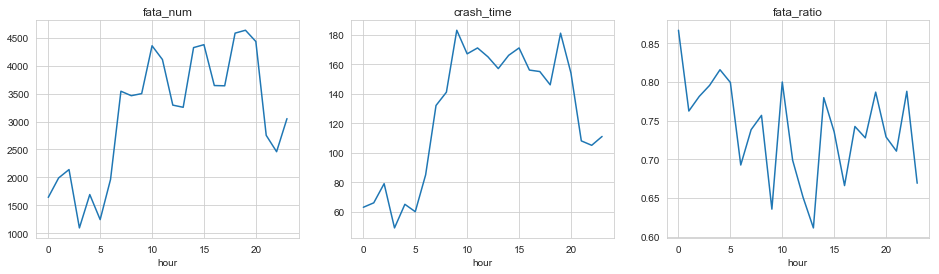

In [215]:
plt.close()
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
hour_fatalities["hour_fatalities_num"].plot(title="fata_num")
plt.subplot(1,3,2)
hour_fatalities["hour_fatalities_time"].plot(title="crash_time")
plt.subplot(1,3,3)
hour_fatalities["hour_fatalities_ratio"].plot(title="fata_ratio")
plt.show()

In [223]:
# 提取 Aboard 的信息
def year_analysis_aboard(x):
    return pd.Series({"year_aboard_num":x["Aboard"].sum(),"year_aboard_time":x.shape[0]})
year_aboard = year_fatalities_fata1.groupby(["year"]).apply(year_analysis_aboard)
year_aboard = year_aboard.sort_index()

# 画 Aboard 和 Fatalities 对比图
from pyecharts import Bar

bar5 = Bar("每年登机和遇难人数")
bar5.add("Aboard", yearlist, year_aboard["year_aboard_num"], mark_line=["average"], mark_point=["max", "min"])
bar5.add("Fatalities", yearlist, year_fatalities["year_fatalities_num"], mark_line=["average"], mark_point=["max", "min"])
bar5.render('每年登机和遇难人数.html')
bar5

In [224]:
print(sum(year_fatalities["year_fatalities_num"]))
print(sum(year_aboard["year_aboard_num"]))
print(sum(year_fatalities["year_fatalities_num"]) / sum(year_aboard["year_aboard_num"]))

105390.0
144457.0
0.7295596613525132


# 机型

In [227]:
type_df = df["Type"]
def type_handle(x):
    x = str(x)
    if "McDonnell Douglas" in x:
        return "McDonnell Douglas"
    elif ("Douglas" in x) & ("McDonnell Douglas" not in x):
        return "Douglas"
    elif ("McDonnell" in x) & ("McDonnell Douglas" not in x):
        return "McDonnell"
    elif "Antonov" in x:
        return "Antonov"
    elif "Boeing" in x:
        return "Boeing"
    elif "Cessna" in x:
        return "Cessna"
    elif "de Havilland" in x:
        return "de Havilland"
    elif "Airbus" in x:
        return "Airbus"
    elif "Embraer" in x:
        return "Embraer"
    elif "Fokker" in x:
        return "Fokker"
    elif "Ilyushin" in x:
        return "Ilyushin"
    elif "Lockheed" in x:
        return "Lockheed"
    else:
        return "other"
company_df = type_df.map(type_handle)
print(pd.value_counts(company_df))

other                2313
Douglas               988
Boeing                376
Lockheed              338
Cessna                300
de Havilland          255
Antonov               248
Fokker                133
McDonnell Douglas     123
Ilyushin               96
Embraer                61
Airbus                 35
McDonnell               2
Name: Type, dtype: int64


In [271]:
company_describe = ['其他','道格拉斯-美国','波音-美国','洛克希德-美国','塞斯纳-苏联','德.哈维尔-英国','安东诺夫-法国',
                   '福克-荷兰','麦克唐纳.道格拉斯-美国','伊尔-苏联','巴西航空工业公司-巴西','空客-法国','麦克唐纳-美国']
company_sol = pd.value_counts(company_df)
company = ['Other','Douglas','Boeing','Lockheed','Cessna','de Havilland','Antonov',
           'Fokker','McDonnell Douglas','Ilyushin','Embraer','Airbbus','McDonnell']
company_num = company_sol.values.tolist()

company_describe_se = pd.Series(company_describe)
company_se = pd.Series(company)
company_num_se = pd.Series(company_num)
company_se = pd.concat([company_se, company_describe_se, company_num_se], axis=1)

company_se

,0,1,2
0,Other,其他,2313
1,Douglas,道格拉斯-美国,988
2,Boeing,波音-美国,376
3,Lockheed,洛克希德-美国,338
4,Cessna,塞斯纳-苏联,300
5,de Havilland,德.哈维尔-英国,255
6,Antonov,安东诺夫-法国,248
7,Fokker,福克-荷兰,133
8,McDonnell Douglas,麦克唐纳.道格拉斯-美国,123
9,Ilyushin,伊尔-苏联,96


In [255]:
company_sol = pd.value_counts(company_df)
company = ['Other','Douglas','Boeing','Lockheed','Cessna','de Havilland','Antonov',
           'Fokker','McDonnell Douglas','Ilyushin','Embraer','Airbbus','McDonnell']
company_num = company_sol.values.tolist()

# 画柱状图
from pyecharts import Bar
bar6 = Bar("出事飞行制造商")
bar6.add("company", company, company_num, is_datazoom_show=True, mark_point=["max", "min"], is_label_show=True)
bar6.render("出事飞行制造商.html")
bar6

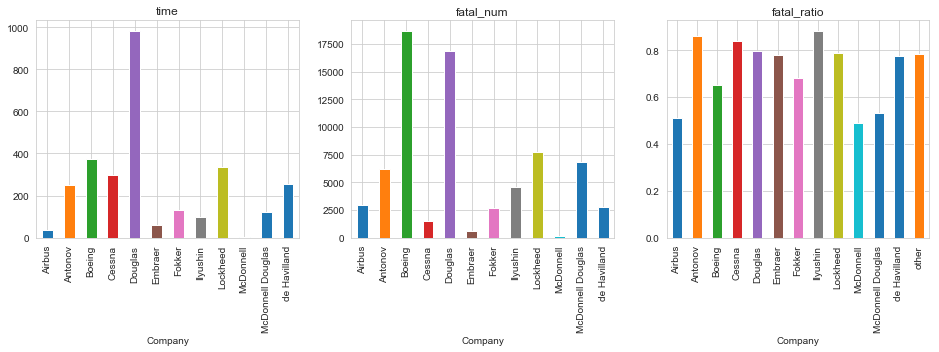

In [262]:
df['Company'] = company_df
fata4 = df[df['Fatalities'].isnull() == False][['Company', 'Aboard', 'Fatalities']]

def airplane_count(x):
    fatal_ratio = x["Fatalities"].sum() / x["Aboard"].sum()
    crash_time = x.shape[0]
    fatal_num = x["Fatalities"].sum()
    return pd.Series({"fatal_num":fatal_num,"crash_time":crash_time,"fatal_ratio":fatal_ratio})

company_fata4 = fata4.groupby(['Company']).apply(airplane_count)

plt.close()
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
company_fata4['crash_time'].drop("other").plot(kind='bar',title="time")
plt.subplot(1,3,2)
company_fata4['fatal_num'].drop("other").plot(kind='bar',title="fatal_num")
plt.subplot(1,3,3)
company_fata4['fatal_ratio'].plot(kind='bar',title="fatal_ratio")
plt.show()

# Summary

# 分词处理

In [7]:
summary = df[df['Summary'].isnull() == False][['Summary']]
# 数据框转化为列表
summary = np.array(summary).tolist()

# 分句处理
import nltk

sent=[]
for i in range(len(summary)):
    sent.append(nltk.tokenize.sent_tokenize(summary[i][0]))
sent[0:3]

[['During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger.',
  'This was the first recorded airplane fatality in history.',
  'One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.',
  'Orville Wright suffered broken ribs, pelvis and a leg.',
  'Selfridge suffered a crushed skull and died a short time later.'],
 ['First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight.'],
 ['The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed.']]

In [8]:
# 分词处理
word = []
for i in sent:
    for j in i:
        word.extend(nltk.tokenize.word_tokenize(j))  # 把各个句子中的词合成一块了
word[0:3]

['During', 'a', 'demonstration']

In [9]:
# 小写处理
word_lower=[i.lower() for i in word]
word_lower[0:3]

['during', 'a', 'demonstration']

In [10]:
# 去除标点符号和停用词
from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '!', '@', '#', '%', '$', '*', '...'] # 自定义英文表单符号列表
word_clear=[]
for i in word_lower:
    if i not in english_stopwords: # 过滤停用词
        if i not in english_punctuations: # 过滤标点符号
            word_clear.append(i)

print ("/".join(word_clear[0:10]))

demonstration/flight/u.s./army/flyer/flown/orville/wright/nose-dived/ground


In [11]:
# 词干化处理
# 将动词去掉-ed, -ing等语态，名词去掉复数形式等
# nltk.stem.porter.PorterStemmer()、nltk.stem.lancaster.LancasterStemmer() 等
from nltk.stem.porter import PorterStemmer
pt = PorterStemmer()
word_stem=[pt.stem(word) for word in word_clear]
word_stem[0:5]

['demonstr', 'flight', 'u.s.', 'armi', 'flyer']

In [12]:
# 简单的统计汇总
# 利用函数 Text() 将分词结果转换为 Text 格式
from nltk.text import Text
word_text=Text(word_stem)

# 识别评论文本中常用固定词组搭配
word_text.collocations(num=20, window_size=2)

cargo plane; weather condit; short runway; attempt land; shortli take;
advers weather; burst flame; poor weather; plane crash; caught fire;
aircraft crash; loss control; midair collis; continu vfr; vfr flight;
emerg land; heavi rain; engin failur; land gear; final approach


In [290]:
# 与不进行词干化处理进行比较
word_text_clear=Text(word_clear)
word_text_clear.collocations(num=20, window_size=2)

cargo plane; attempting land; weather conditions; short runway;
shortly taking; adverse weather; poor weather; plane crashed; caught
fire; burst flames; emergency landing; loss control; aircraft crashed;
midair collision; landing gear; vfr flight; continued vfr; engine
failure; heavy rain; final approach


In [291]:
# 利用 Counter 计数器统计出现次数最多的前 20 个单词
from collections import Counter
word_counter=Counter(word_stem)
word_counter.most_common(20)

[('crash', 3458),
 ('aircraft', 2469),
 ('plane', 1913),
 ('land', 1373),
 ('pilot', 1348),
 ('engin', 1119),
 ('flight', 1063),
 ('approach', 1011),
 ('runway', 919),
 ('failur', 886),
 ('crew', 831),
 ('mountain', 775),
 ('attempt', 756),
 ("'s", 697),
 ('take', 647),
 ('control', 629),
 ('airport', 629),
 ('weather', 606),
 ('altitud', 602),
 ('condit', 597)]

In [292]:
# 与不进行词干化处理进行比较
from collections import Counter
word_counter_clear=Counter(word_clear)
word_counter_clear.most_common(20)

[('crashed', 3214),
 ('aircraft', 2467),
 ('plane', 1863),
 ('pilot', 1198),
 ('flight', 1052),
 ('approach', 940),
 ('engine', 923),
 ('runway', 914),
 ('failure', 878),
 ('crew', 810),
 ('landing', 732),
 ("'s", 697),
 ('airport', 625),
 ('weather', 606),
 ('altitude', 598),
 ('mountain', 556),
 ('takeoff', 547),
 ('conditions', 540),
 ('taking', 534),
 ('land', 522)]

In [293]:
# 上下文相关内容
word_text.concordance("weather",lines=10)

Displaying 10 of 25 matches:
g kill attempt forc land crash poor weather shenandoah fli southern ohio abrupt
n ground free balloon crash en rout weather relat crash advers weather condit e
 en rout weather relat crash advers weather condit engin failur much weight cau
i first trans-atlantipasseng flight weather relat plane flight london pari powe
ruck water crash rio de janeiro bay weather relat mail plane crash appl tree sn
ft crash lake constanc attempt land weather relat plane crash go tail spin mech
ngel pilot fli low altitud due poor weather condit tri turn back left turn left
 wing struck hill crash burn advers weather condit plane flew sudden squall cau
r supervisor pilot took extrem poor weather condit encount fog attempt turn bac
e struck mountain burn encount poor weather condit former american armi flyer d


In [294]:
# 上下文相关内容
word_text_clear.concordance("weather",lines=10)

Displaying 10 of 25 matches:
tempted forced landing crashed poor weather shenandoah flying southern ohio abr
round free balloon crashed en route weather related crashed adverse weather con
ute weather related crashed adverse weather conditions engine failure much weig
first trans-atlantipassenger flight weather related plane flight london paris p
ck water crashed rio de janeiro bay weather related mail plane crashed apple tr
d lake constance attempting landing weather related plane crashed going tail sp
 pilot flying low altitude due poor weather conditions tried turn back left tur
 struck hill crashed burned adverse weather conditions plane flew sudden squall
upervisor pilot took extremely poor weather conditions encountering fog attempt
k mountain burned encountering poor weather conditions former american army fly


In [295]:
print(len(set(word_clear)))
print(len(set(word_stem)))

10193
8189


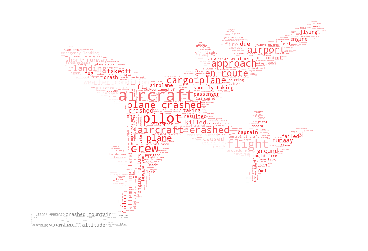

In [296]:
# 画词云图
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

backgroud_Image = plt.imread('C:\\Users\\Administrator\\Desktop\\大数据学院\\统计软件\\期末资料\\空难数据\\plane.jpg')   # 自己可以换
wc1 = WordCloud(mask = backgroud_Image,
               max_words = 2000,
               max_font_size = 50,
              background_color='white') 
wc1.generate(' '.join(word_clear))
image_colors = ImageColorGenerator(backgroud_Image)
wc1.recolor(color_func = image_colors)
plt.imshow(wc1)
plt.axis('off')
plt.show()

# 储存图片
wc.to_file("summary.jpg")

# 遇难原因探究

In [302]:
# icing, fog, turbulence, meteorological气象, thunderstorm, poor, whiteout
word_text_clear = Text(word_clear)
word_text_clear.similar('weather')

visibility icing judgement fog turbulence judgment ifr meteorological
foggy thunderstorm trees poor mountains instrument visiblity imc
whiteout flight ground aircraft


In [303]:
# fog, sea, ocean
word_text_clear.similar('mountains')

sea burned mountain ocean ground trees field approach takeoff hill fog
mountainside jungle crashed taking water hillside approximately house
forest


In [304]:
word_text_clear.similar('sea')

burned approach takeoff mountain ground ocean trees field mountains
hill mountainside atlantiocean jungle water crashed taking landing fog
houses pacifiocean


In [306]:
word_text_clear.similar('engine')

wing pilot control crashed plane structural engines power turn
mechanical crew aircraft altitude takeoff fatigue stalled right caught
taking bank


In [307]:
word_text_clear.similar('altitude')

height control crashed engine speed ceiling ground aircraft power
plane visibility flying pilot approach range terrain feet two sea
landing


In [308]:
word_text_clear.similar('fail')

engine resulted height separated control immediately take section
caused collapse failed engines takeoff buckled dropped cargo well
rescued increased applied


# 词性标注

In [22]:
from nltk.tag import pos_tag

# 筛选出形容词和名词
ADJ=[]
NOUN=[]
for a,b in pos_tag(word_stem):
    if b=="JJ":
        ADJ.append(a)
    elif b=="NN":
        NOUN.append(a)

print('形容词个数： '+str(len(ADJ)))
print('名词个数： '+str(len(NOUN)))

形容词个数： 15218
名词个数： 58581


In [20]:
# 查看出现次数较多的形容词
from collections import Counter
c1=Counter(ADJ)
for i in c1.most_common(20):
    print (i[0],i[1])

poor 357
due 311
short 302
low 288
high 228
engin 178
failur 168
right 166
tree 154
final 153
visual 141
crash 125
altitud 124
unknown 119
safe 119
mile 115
second 113
in-flight 112
undetermin 110
minimum 105


In [23]:
# 查看出现次数较多的名词
from collections import Counter
c2=Counter(NOUN)
for i in c2.most_common(20):
    print (i[0],i[1])

crash 3299
aircraft 2425
plane 1879
pilot 1325
land 1287
flight 1063
approach 981
engin 820
mountain 751
attempt 695
runway 626
control 612
airport 599
condit 587
failur 577
crew 501
ground 482
fire 447
caus 434
rout 426
